In [1]:
from sowce.data.dataset_classes import VisiumCohort
from loguru import logger
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
#from scikit_posthocs import posthoc_dunn


/home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/owkin/.config/sagemaker/config.yaml


In [2]:
cell_types = ['B_cell',
 'DC',
 'Endothelial',
 'Fibroblast',
 'Granulocyte',
 'Malignant_bladder',
 'Mast',
 'MoMac',
 'Plasma',
 'Smooth_muscle',
 'T_NK']
n_celltypes = len(cell_types)

# Unsupervised

In [179]:
ImageName = "CH_B_010a_vis"
#ImageName = "CH_B_006b_vis"
"CH_B_004b_vbu"
timestamp = "2024-11-19_10-41-40"

In [108]:
fractions = np.load(f"/home/owkin/project/cytocommunity_results/fractions/raw/{ImageName}_DeconvolutionFrac.npy")
tcn = pd.read_csv(
    f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/{ImageName}/{timestamp}/ensemble/TCNLabel_MajorityVoting.csv",
    header = None
)
n_spots = tcn.shape[0]
tcn = tcn[0].tolist()
n_tcns = np.max(tcn)

fractions_per_tcn = np.zeros((n_celltypes, n_tcns))
for tcn_num in range(n_tcns):
    indices = [index for index, value in enumerate(tcn) if value == (tcn_num+1)]
    fractions_per_tcn[:, tcn_num] = np.mean(fractions[indices, :], axis=0)

# Create the heatmap
plt.figure(figsize=(6, 4))  # Optional: Set figure size
sns.heatmap(fractions_per_tcn, annot=True, cmap="Blues", cbar=True)

# Add labels and title
plt.title("Average fraction per spot")
plt.xlabel("Predicted TCN")
plt.ylabel("Cell type")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/CH_B_010a_vis/2024-11-19_10-41-40/ensemble/TCNLabel_MajorityVoting.csv'

# Supervised

In [3]:
ImageName = "CH_B_010a_vis"
#ImageName = "CH_B_006b_vis"
#ImageName = "CH_B_004b_vbu"
timestamp = "2024-11-19_10-41-40"

In [4]:
fractions = np.load(f"/home/owkin/project/cytocommunity_results/fractions/raw/{ImageName}_DeconvolutionFrac.npy")
tcn = pd.read_csv(
    f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/{timestamp}/ensemble/ImageCollection/{ImageName}/TCNLabel_MajorityVoting.csv",
    header = None
)
n_spots = tcn.shape[0]
tcn = tcn[0].tolist()
n_tcns = 5

fractions_per_tcn = np.zeros((n_celltypes, n_tcns))
for tcn_num in range(n_tcns):
    indices = [index for index, value in enumerate(tcn) if value == (tcn_num+1)]
    fractions_per_tcn[:, tcn_num] = np.mean(fractions[indices, :], axis=0)

fractions_per_tcn = np.nan_to_num(fractions_per_tcn, nan=0.0)

# Create the heatmap
plt.figure(figsize=(1, 3))  # Optional: Set figure size
sns.heatmap(fractions_per_tcn, xticklabels=[str(i+1) for i in range(5)], yticklabels=cell_types, annot=False, cmap="Blues", cbar=False)

# Add labels and title
#plt.title("Average fraction per spot")
plt.xlabel("TCN")
#plt.ylabel("Cell type")
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│    1 fractions = np.load(f"/home/owkin/project/cytocommunity_results/fractions/raw/{ImageName    │
│ ❱  2 tcn = pd.read_csv(                                                                          │
│    3 │   f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/{timest    │
│    4 │   header = None                                                                           │
│    5 )                                                                                           │
│                                                                                                  │
│ /home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/pandas/io/parsers/readers. │
│ py:1026 in read_csv                                                                              │
│                                                                                                  │
│   1023 │   )                                                                                     │
│   1024 │   kwds.update(kwds_defaults)                                                            │
│   1025 │                                                                                         │
│ ❱ 1026 │   return _read(filepath_or_buffer, kwds)                                                │
│   1027                                                                                           │
│   1028                                                                                           │
│   1029 # iterator=True -> TextFileReader                                                         │
│                                                                                                  │
│ /home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/pandas/io/parsers/readers. │
│ py:620 in _read                                                                                  │
│                                                                                                  │
│    617 │   _validate_names(kwds.get("names", None))                                              │
│    618 │                                                                                         │
│    619 │   # Create the parser.                                                                  │
│ ❱  620 │   parser = TextFileReader(filepath_or_buffer, **kwds)                                   │
│    621 │                                                                                         │
│    622 │   if chunksize or iterator:                                                             │
│    623 │   │   return parser                                                                     │
│                                                                                                  │
│ /home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/pandas/io/parsers/readers. │
│ py:1620 in __init__                                                                              │
│                                                                                                  │
│   1617 │   │   │   self.options["has_index_names"] = kwds["has_index_names"]                     │
│   1618 │   │                                                                                     │
│   1619 │   │   self.handles: IOHandles | None = None                                             │
│ ❱ 1620 │   │   self._engine = self._make_engine(f, self.engine)                                  │
│   1621 │                                                                                         │
│   1622 │   def close(self) -> None:                        

In [5]:
file_path = "/home/owkin/project/cytocommunity_results/fractions/raw/ImageNameList.txt"
# Open and read the file into a list
with open(file_path, "r") as file:
    ImageNameAll = [line.strip() for line in file]  # Remove trailing newlines/whitespaces

In [7]:
#fractions_per_tcn = np.zeros((n_celltypes, n_tcns))
n_tcns = 5
fractions_all = np.zeros((11,n_tcns,74))

for ind_sample, ImageName in enumerate(ImageNameAll):

    fractions = np.load(f"/home/owkin/project/cytocommunity_results/fractions/raw/{ImageName}_DeconvolutionFrac.npy")
    tcn = pd.read_csv(
        f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/{timestamp}/ensemble/ImageCollection/{ImageName}/TCNLabel_MajorityVoting_15.csv",
        header = None
    )
    n_spots = tcn.shape[0]
    tcn = tcn[0].tolist()
    
    for tcn_num in range(n_tcns):
        indices = [index for index, value in enumerate(tcn) if value == (tcn_num+1)]
        if len(indices) > 0:
            mean_fractions = np.mean(fractions[indices, :], axis=0)
            fractions_all[:, tcn_num, ind_sample] += mean_fractions
    
        #fractions_per_tcn = np.nan_to_num(fractions_per_tcn, nan=0.0)

fractions_per_tcn = np.mean(fractions_all, axis=-1)
    
# Create the heatmap
plt.figure(figsize=(6, 4))  # Optional: Set figure size
sns.heatmap(fractions_per_tcn, xticklabels=[str(i+1) for i in range(n_tcns)], yticklabels=cell_types, annot=np.array(annotations), fmt="", cmap="Blues", cbar=True)

# Add labels and title
plt.title("Average fraction per spot")
plt.xlabel("Predicted TCN")
plt.ylabel("Cell type")
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:27                                                                                   │
│                                                                                                  │
│   24                                                                                             │
│   25 # Create the heatmap                                                                        │
│   26 plt.figure(figsize=(6, 4))  # Optional: Set figure size                                     │
│ ❱ 27 sns.heatmap(fractions_per_tcn, xticklabels=[str(i+1) for i in range(n_tcns)], yticklabel    │
│   28                                                                                             │
│   29 # Add labels and title                                                                      │
│   30 plt.title("Average fraction per spot")                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'annotations' is not defined

<Figure size 600x400 with 0 Axes>

In [84]:
ind_celltype = 2

data = []
for i in range(5):
    data.append(list(fractions_all[ind_celltype, i, :]))

p_values = posthoc_dunn(data, p_adjust='holm')

In [85]:
import pandas as pd
from scikit_posthocs import posthoc_dunn

data = []
for i in range(5):
    data += list(fractions_all[ind_celltype, i, :])

# Define group labels
groups = (
    ['group1'] * 74 +
    ['group2'] * 74 +
    ['group3'] * 74 +
    ['group4'] * 74 +
    ['group5'] * 74
)

# Create a DataFrame
df = pd.DataFrame({"values": data, "groups": groups})

# Initialize dictionary to store results
p_values_1_vs_all = {}

# Iterate over each group for "1 vs. all"
for target_group in df['groups'].unique():
    # Create "1 vs all" group labels
    df['groups_1_vs_all'] = df['groups'].apply(lambda x: target_group if x == target_group else 'all_others')
    
    # Perform Dunn's test
    p_values = posthoc_dunn(df, val_col="values", group_col="groups_1_vs_all", p_adjust='holm')
    
    # Extract p-value for the "1 vs all" comparison
    p_value = p_values.loc[target_group, 'all_others']
    
    # Calculate medians to determine direction
    target_median = df[df['groups_1_vs_all'] == target_group]['values'].median()
    all_others_median = df[df['groups_1_vs_all'] == 'all_others']['values'].median()
    
    # Determine direction
    direction = "higher" if target_median > all_others_median else "lower"
    
    # Store results
    p_values_1_vs_all[target_group] = {
        "p_value": p_value,
        "direction": direction,
        "target_median": target_median,
        "all_others_median": all_others_median,
    }

# Print results
for group, results in p_values_1_vs_all.items():
    print(f"1 vs. All for {group}:")
    print(f"  p-value: {results['p_value']:.5f}")
    print(f"  Direction: {group} is significantly {results['direction']} than all others.")
    print(f"  Median ({group}): {results['target_median']}")
    print(f"  Median (All Others): {results['all_others_median']}")
    print()



1 vs. All for group1:
  p-value: 0.00004
  Direction: group1 is significantly higher than all others.
  Median (group1): 0.06118072897452481
  Median (All Others): 0.03850388506291584

1 vs. All for group2:
  p-value: 0.00000
  Direction: group2 is significantly lower than all others.
  Median (group2): 0.010860862830786647
  Median (All Others): 0.053172168467848585

1 vs. All for group3:
  p-value: 0.00000
  Direction: group3 is significantly higher than all others.
  Median (group3): 0.08008057459162375
  Median (All Others): 0.03356434994359005

1 vs. All for group4:
  p-value: 0.00285
  Direction: group4 is significantly higher than all others.
  Median (group4): 0.05269647471010754
  Median (All Others): 0.03808906141225893

1 vs. All for group5:
  p-value: 0.00000
  Direction: group5 is significantly lower than all others.
  Median (group5): 0.021898587547116988
  Median (All Others): 0.05449420479141258



In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from scikit_posthocs import posthoc_dunn

# Example Data (fractions_all)
import numpy as np
np.random.seed(42)
#fractions_all = np.random.rand(74, 5, 10)  # Example fractions

annotations = []

for ind_celltype in range(11):  # Select a specific cell type for analysis

    data = []
    for i in range(n_tcns):
        data += list(fractions_all[ind_celltype, i, :])
    
    # Define group labels
    groups = (
        ['group1'] * 74 +
        ['group2'] * 74 +
        ['group3'] * 74 +
        ['group4'] * 74 +
        ['group5'] * 74
    )
    
    # Create a DataFrame
    df = pd.DataFrame({"values": data, "groups": groups})
    
    # Initialize dictionary to store results
    p_values_1_vs_all = {}
    
    # Iterate over each group for "1 vs. all"
    for target_group in df['groups'].unique():
        # Create "1 vs all" group labels
        df['groups_1_vs_all'] = df['groups'].apply(lambda x: target_group if x == target_group else 'all_others')
        
        # Perform Dunn's test
        p_values = posthoc_dunn(df, val_col="values", group_col="groups_1_vs_all", p_adjust='holm')
        
        # Extract p-value for the "1 vs all" comparison
        p_value = p_values.loc[target_group, 'all_others']
        
        # Calculate medians to determine direction
        target_median = df[df['groups_1_vs_all'] == target_group]['values'].median()
        all_others_median = df[df['groups_1_vs_all'] == 'all_others']['values'].median()
        
        # Determine direction
        direction = "higher" if target_median > all_others_median else "lower"
        
        # Map p-values to significance levels
        if direction == "lower":
            significance = ""
        elif p_value < 0.001:
            significance = "***"
        elif p_value < 0.01:
            significance = "**"
        elif p_value < 0.05:
            significance = "*"
        else:
            significance = ""
        
        # Store results
        p_values_1_vs_all[target_group] = {
            "p_value": p_value,
            "direction": direction,
            "target_median": target_median,
            "all_others_median": all_others_median,
            "significance": significance,
        }

    annotations.append([p_values_1_vs_all[f'group{i+1}']['significance'] for i in range(n_tcns)])


# Within TCN interactions

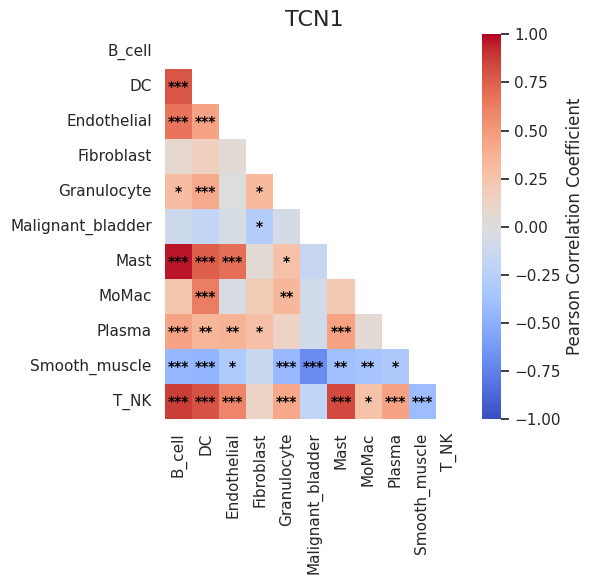

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

# Example data
np.random.seed(42)
tcn_num = 0
num_cell_types = 11

# Initialize matrices
correlation_matrix = np.zeros((num_cell_types, num_cell_types))
p_value_matrix = np.zeros((num_cell_types, num_cell_types))
significance_annotations = [["" for _ in range(num_cell_types)] for _ in range(num_cell_types)]

# Store unique (non-redundant) p-values
unique_p_values = []

# Compute correlation and p-values for each unique pair
for i in range(num_cell_types):
    for j in range(i + 1, num_cell_types):  # Only upper triangle
        x = fractions_all[i, tcn_num, :]
        y = fractions_all[j, tcn_num, :]
        correlation, p_value = pearsonr(x, y)
        correlation_matrix[i, j] = correlation
        correlation_matrix[j, i] = correlation  # Symmetry
        p_value_matrix[i, j] = p_value
        p_value_matrix[j, i] = p_value  # Symmetry
        unique_p_values.append(p_value)

# Apply FDR correction
rejected, corrected_p_values, _, _ = multipletests(unique_p_values, method='fdr_bh')

# Map corrected p-values back to the matrix
corrected_p_value_matrix = np.zeros_like(p_value_matrix)
index = 0
for i in range(num_cell_types):
    for j in range(i + 1, num_cell_types):  # Only upper triangle
        corrected_p_value_matrix[i, j] = corrected_p_values[index]
        corrected_p_value_matrix[j, i] = corrected_p_values[index]  # Symmetry
        index += 1

# Assign significance annotation
for i in range(num_cell_types):
    for j in range(num_cell_types):
        p_value = corrected_p_value_matrix[i][j]
        if p_value < 0.001:
            significance_annotations[i][j] = "***"
        elif p_value < 0.01:
            significance_annotations[i][j] = "**"
        elif p_value < 0.05:
            significance_annotations[i][j] = "*"
        else:
            significance_annotations[i][j] = ""

# Create a mask to show only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set Seaborn style to remove grid
sns.set(style="white")  # Remove grid background
plt.figure(figsize=(6, 6))

# Plot heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Mask the upper triangle
    annot=np.array(significance_annotations),  # Use significance annotations
    fmt='',  # Empty string as we manually handle formatting
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    xticklabels=cell_types,
    yticklabels=cell_types,
    cbar_kws={'label': 'Pearson Correlation Coefficient'},
    annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'},
    linewidths=0  # Remove gridlines inside the heatmap
)

# Add labels and title
plt.title(f"TCN{tcn_num+1}", fontsize=16)
plt.tight_layout()

# Show plot
plt.show()


# Focus on TCN1 mast vs B cell

In [191]:
tcn_num = 0
cell_type_x = 'Endothelial'
cell_type_y = 'Mast'
i = cell_types.index(cell_type_x)
j = cell_types.index(cell_type_y)
x = fractions_all[i, tcn_num, :]
y = fractions_all[j, tcn_num, :]
correlation, p_value = pearsonr(x, y)
correlation, p_value

(0.692662687143872, 8.086821821888952e-12)

Text(0, 0.5, 'Mast')

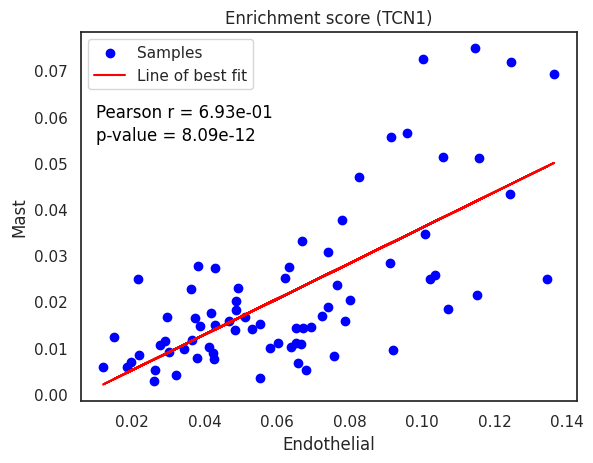

In [207]:
from scipy import stats

# Calculate Pearson's correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(x, y)

# Create scatter plot
plt.scatter(x, y, label='Samples', color='blue')
plt.xlabel('X')
plt.ylabel('Y')

# Fit line and plot
slope, intercept, r_value, p_value_line, std_err = stats.linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Line of best fit')

# Display Pearson's correlation coefficient and p-value on the plot
plt.text(0.01, 0.06, f'Pearson r = {corr_coefficient:.2e}', fontsize=12, color='black')
plt.text(0.01, 0.055, f'p-value = {p_value:.2e}', fontsize=12, color='black')

# Show plot
plt.legend()
plt.title("Enrichment score (TCN1)")
plt.xlabel(cell_type_x)
plt.ylabel(cell_type_y)